<a href="https://colab.research.google.com/github/RuwaAbey/Finaly_Year_Project_G09/blob/main/Heatmap_plots_for_NTU_RGB_hrnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.5.1+cu124
True
Tesla T4


In [2]:
!pip install mmcv==1.5.0
!pip install fvcore

In [3]:
import mmcv
print(mmcv.__version__)

1.5.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My\ Drive/G_09

/content/drive/My Drive/G_09


In [6]:
!git clone https://github.com/kennymckormick/pyskl.git

fatal: destination path 'pyskl' already exists and is not an empty directory.


In [7]:
%cd /content/drive/My\ Drive/G_09/pyskl

/content/drive/My Drive/G_09/pyskl


In [8]:
import pyskl
import numpy as np

In [9]:
import pickle

%cd /content/drive/My\ Drive/G09_Final_Year_Project/pkl

# Load the pickle file
with open('ntu60_hrnet.pkl', 'rb') as f:
    data = pickle.load(f)

# Check the top-level keys
print(data.keys())  # Should print: ['split', 'annotations']

/content/drive/My Drive/G09_Final_Year_Project/pkl
dict_keys(['split', 'annotations'])


In [10]:
ntu_annos = data['annotations'][0]
print(ntu_annos)

{'frame_dir': 'S001C001P001R001A001', 'label': 0, 'img_shape': (1080, 1920), 'original_shape': (1080, 1920), 'total_frames': 103, 'keypoint': array([[[[1032. ,  334.8],
         [1041. ,  325.8],
         [1023.5,  325.8],
         ...,
         [1028. ,  611.5],
         [1063. ,  704. ],
         [1037. ,  695. ]],

        [[1032. ,  334. ],
         [1041. ,  325. ],
         [1023. ,  325. ],
         ...,
         [1027. ,  612.5],
         [1063. ,  707. ],
         [1036. ,  693.5]],

        [[1032. ,  334. ],
         [1041. ,  325. ],
         [1023. ,  325. ],
         ...,
         [1027. ,  612.5],
         [1063. ,  707. ],
         [1036. ,  698. ]],

        ...,

        [[1037. ,  321.8],
         [1050. ,  317.5],
         [1033. ,  313. ],
         ...,
         [1028. ,  612. ],
         [1064. ,  704. ],
         [1037. ,  695.5]],

        [[1039. ,  324. ],
         [1048. ,  315.2],
         [1035. ,  315.2],
         ...,
         [1030. ,  611. ],
         [

In [12]:
keypoint_pipeline = [
    dict(type='PoseDecode'),
    dict(type='PoseCompact', hw_ratio=1., allow_imgpad=True),
    dict(type='Resize', scale=(-1, 64)),
    dict(type='CenterCrop', crop_size=64),
    dict(type='GeneratePoseTarget', with_kp=True, with_limb=False)
]

limb_pipeline = [
    dict(type='PoseDecode'),
    dict(type='PoseCompact', hw_ratio=1., allow_imgpad=True),
    dict(type='Resize', scale=(-1, 64)),
    dict(type='CenterCrop', crop_size=64),
    dict(type='GeneratePoseTarget', with_kp=False, with_limb=True)
]

from pyskl.datasets.pipelines import Compose
def get_pseudo_heatmap(anno, flag='keypoint'):
    assert flag in ['keypoint', 'limb']
    pipeline = Compose(keypoint_pipeline if flag == 'keypoint' else limb_pipeline)
    return pipeline(anno)['imgs']

def vis_heatmaps(heatmaps, channel=-1, ratio=8):
    # if channel is -1, draw all keypoints / limbs on the same map
    import matplotlib.cm as cm
    heatmaps = [x.transpose(1, 2, 0) for x in heatmaps]
    h, w, _ = heatmaps[0].shape
    newh, neww = int(h * ratio), int(w * ratio)

    if channel == -1:
        heatmaps = [np.max(x, axis=-1) for x in heatmaps]
    cmap = cm.viridis
    heatmaps = [(cmap(x)[..., :3] * 255).astype(np.uint8) for x in heatmaps]
    heatmaps = [cv2.resize(x, (neww, newh)) for x in heatmaps]
    return heatmaps

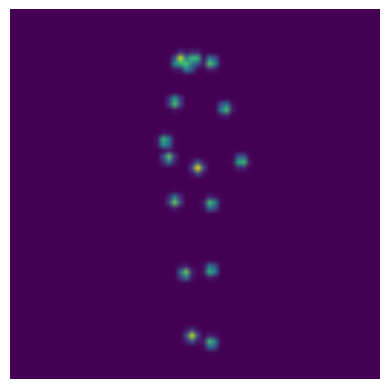

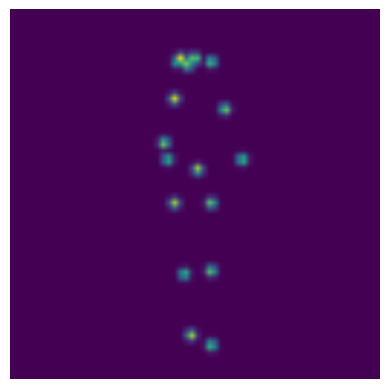

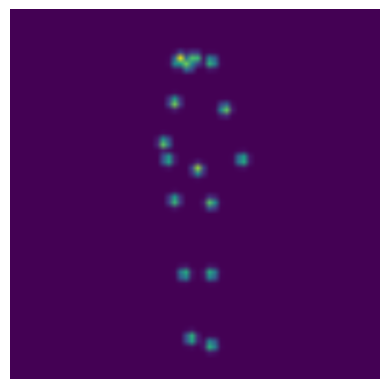

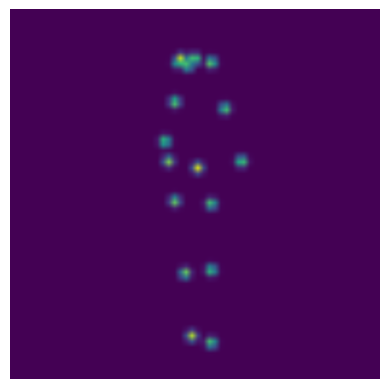

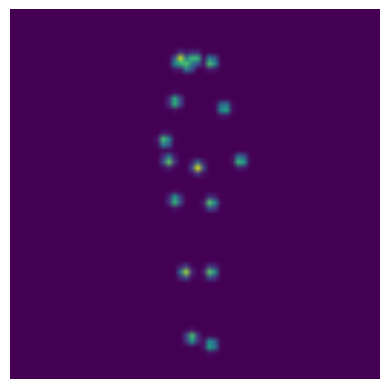

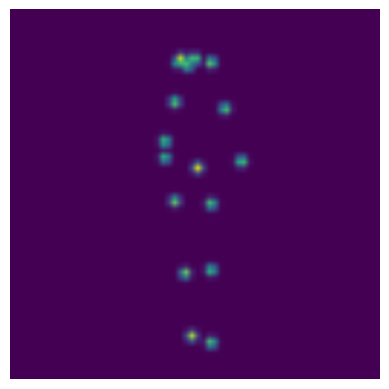

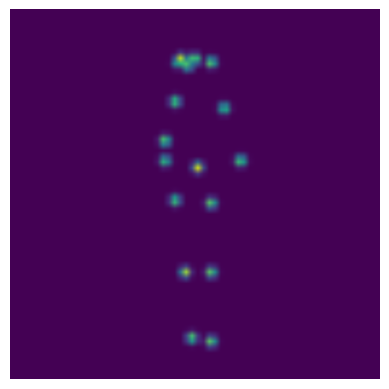

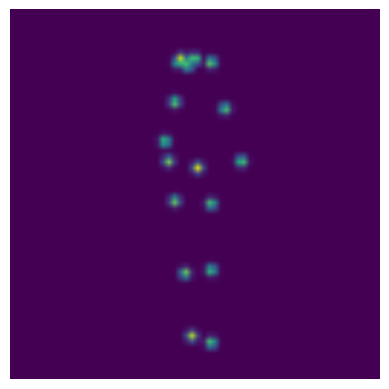

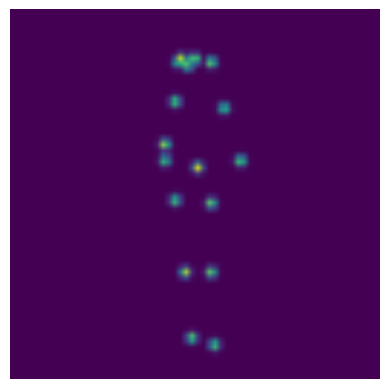

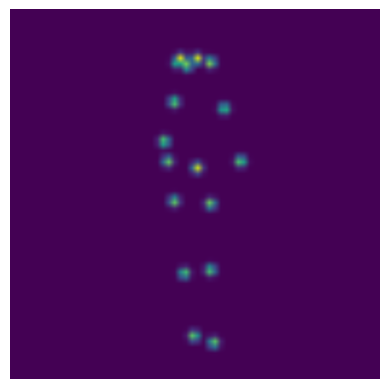

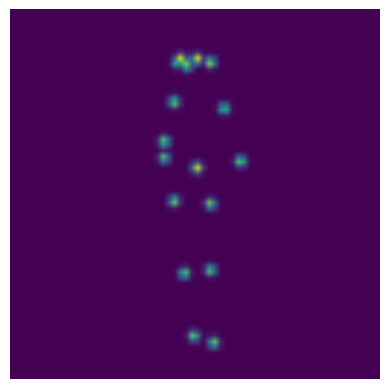

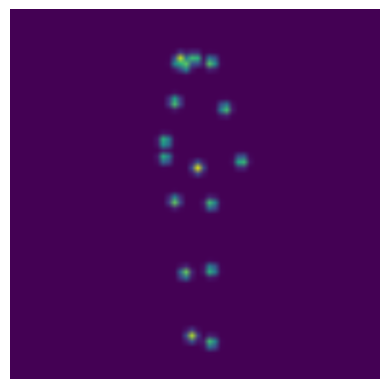

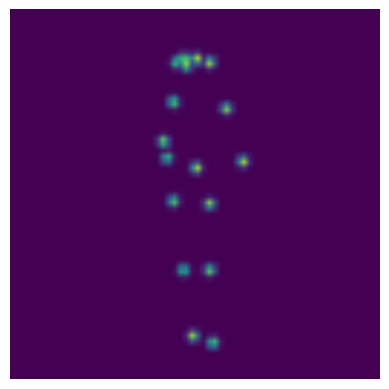

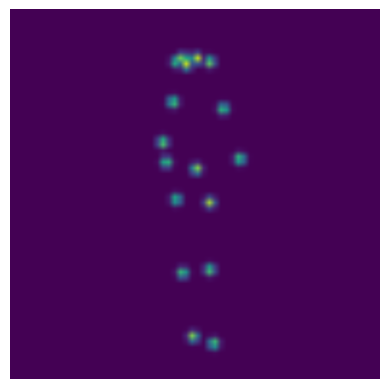

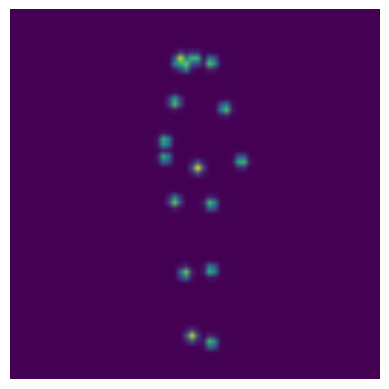

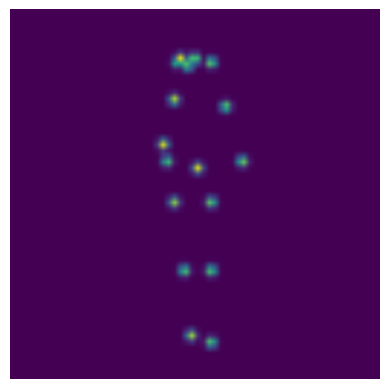

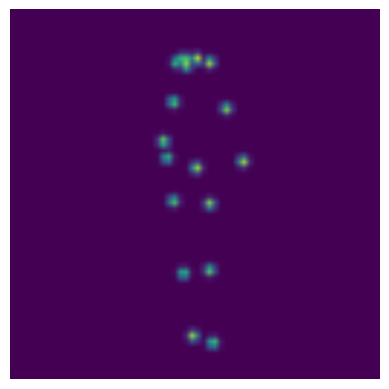

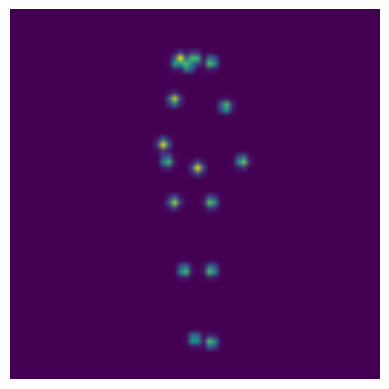

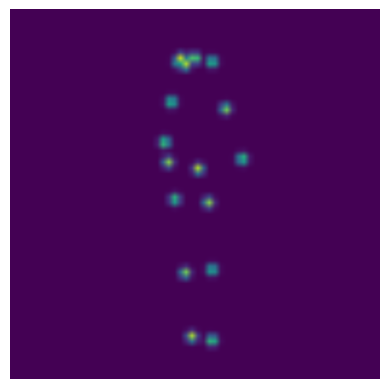

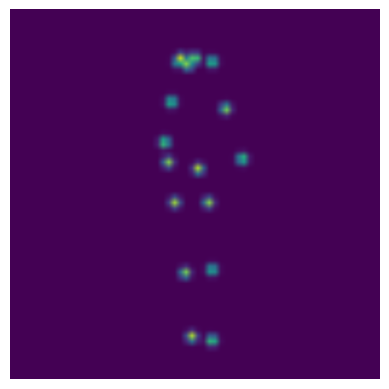

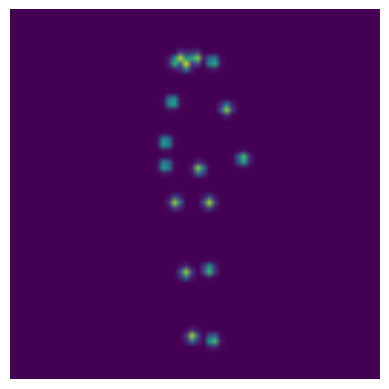

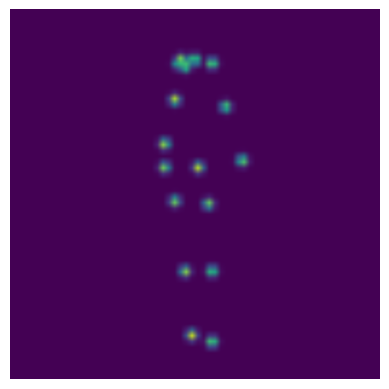

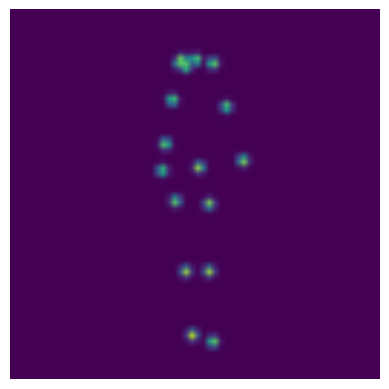

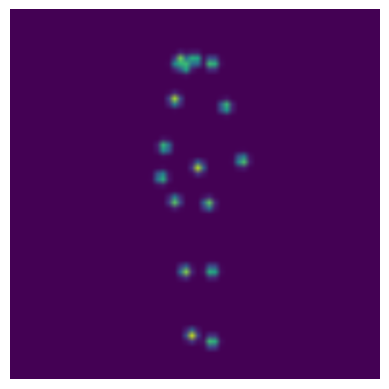

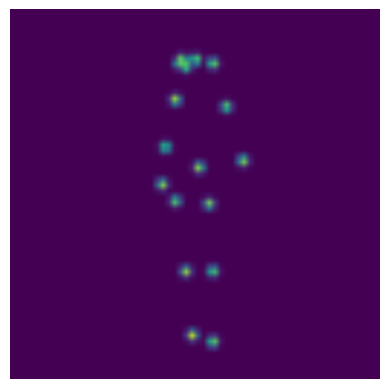

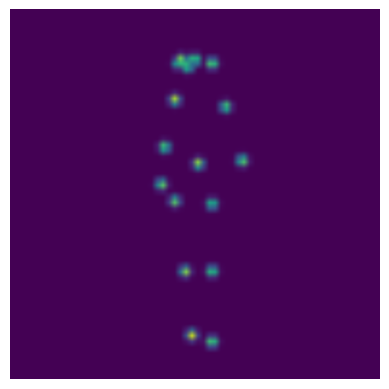

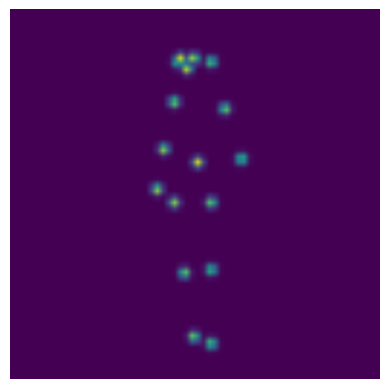

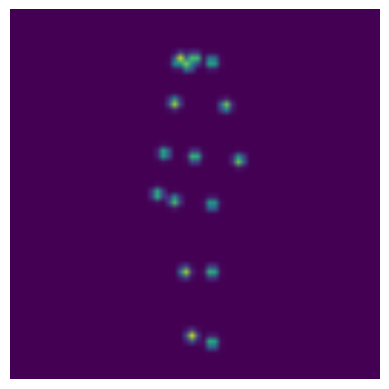

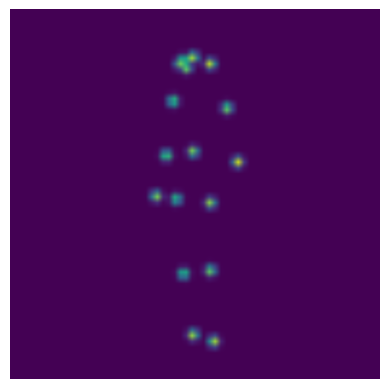

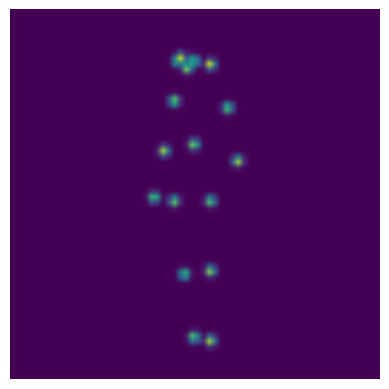

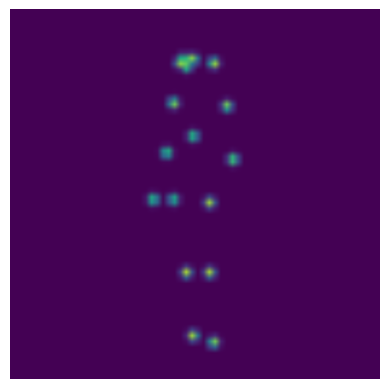

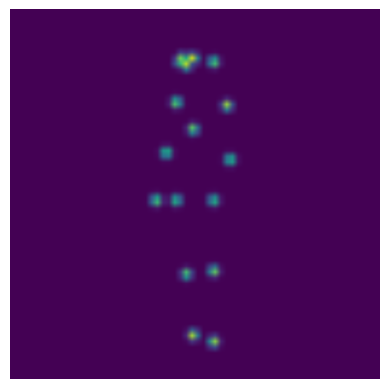

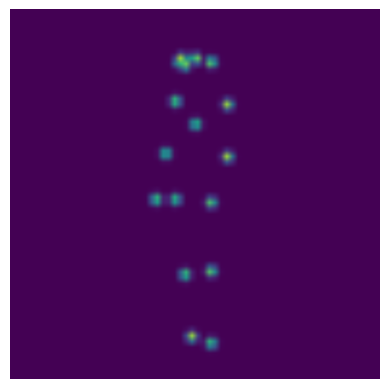

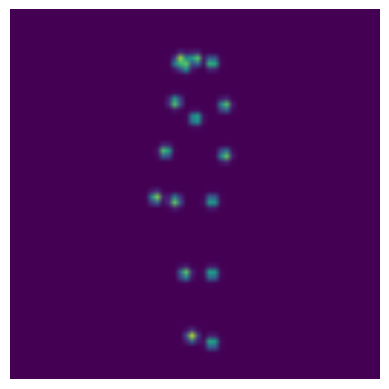

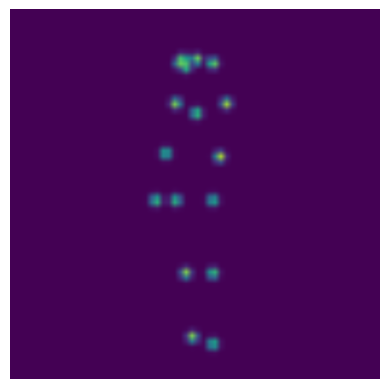

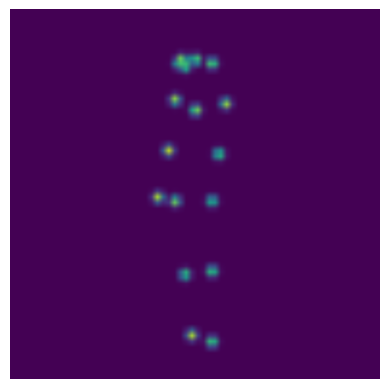

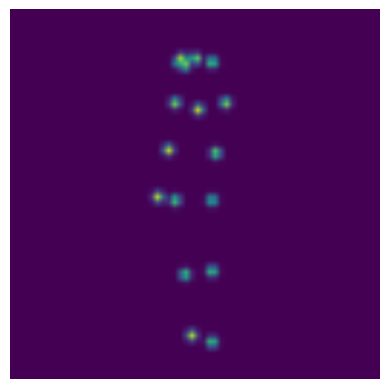

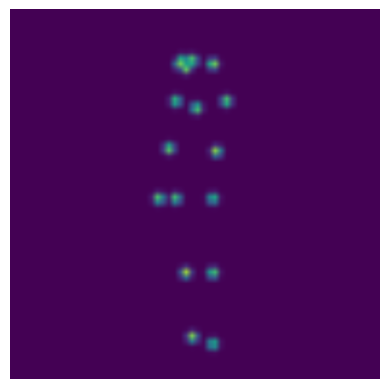

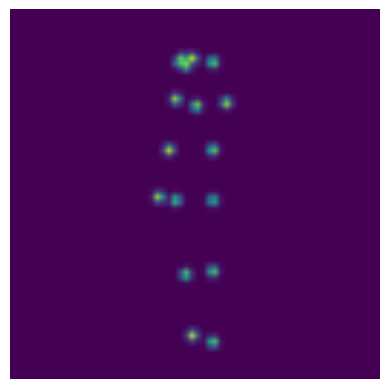

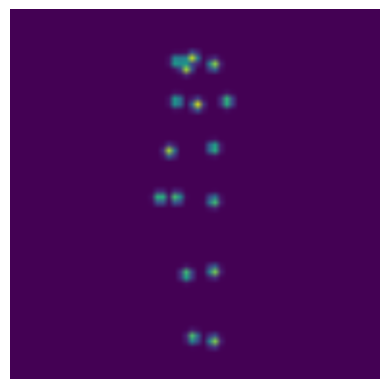

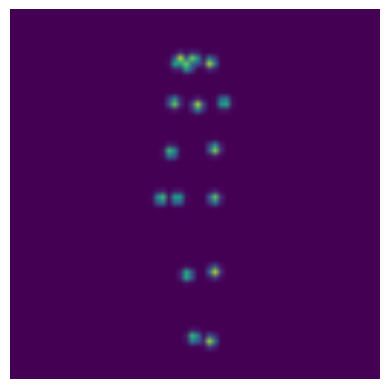

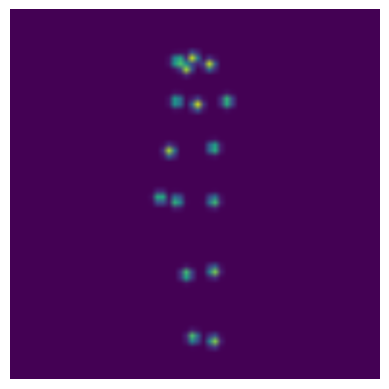

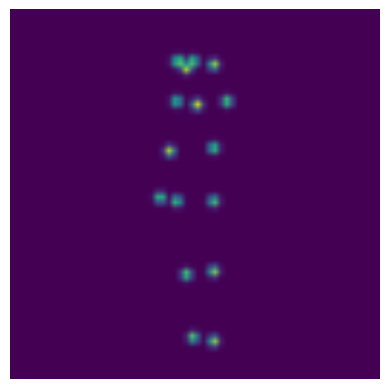

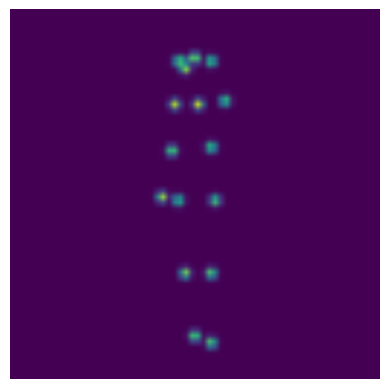

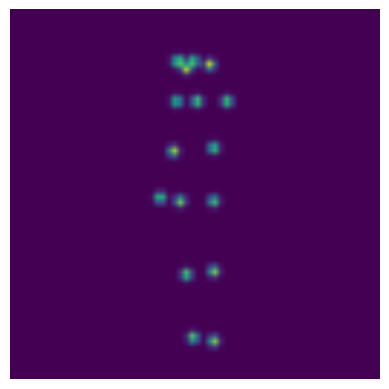

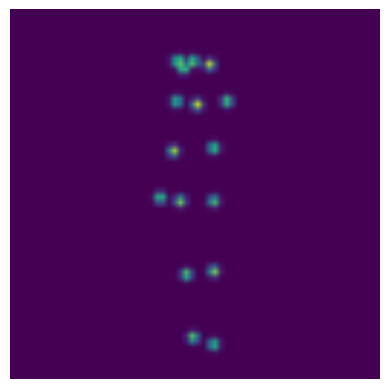

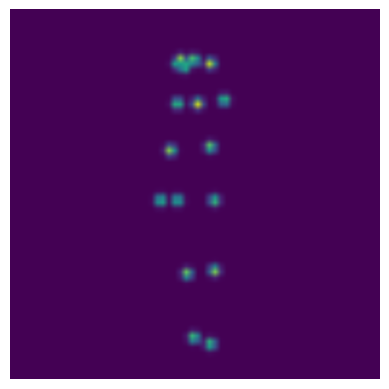

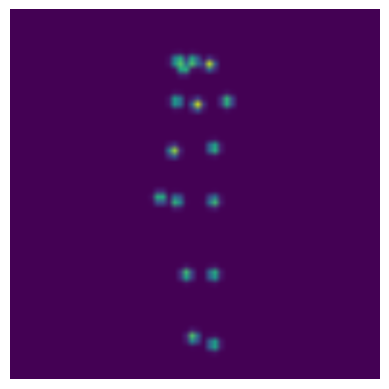

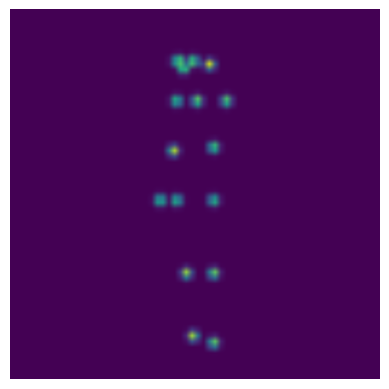

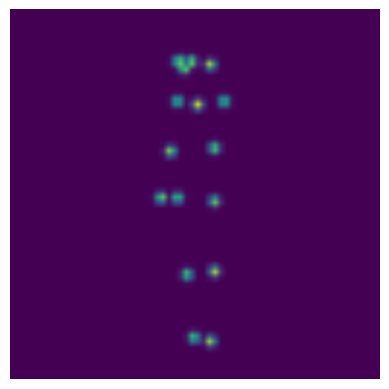

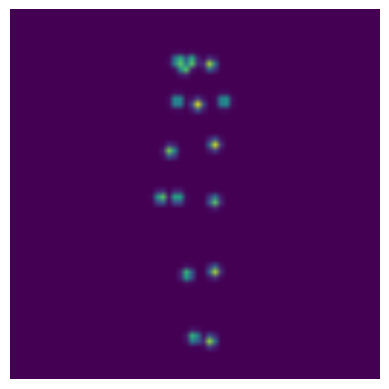

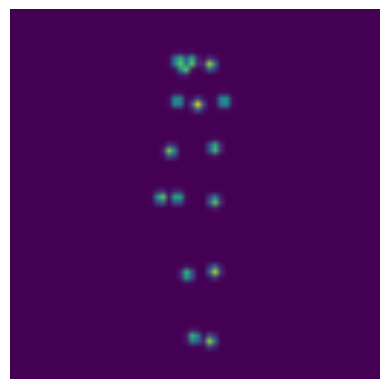

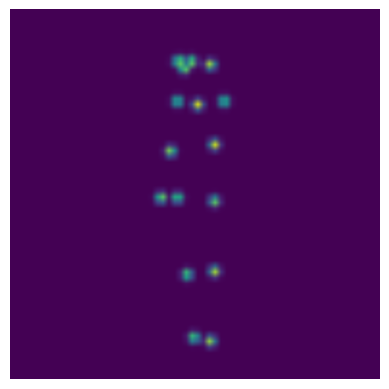

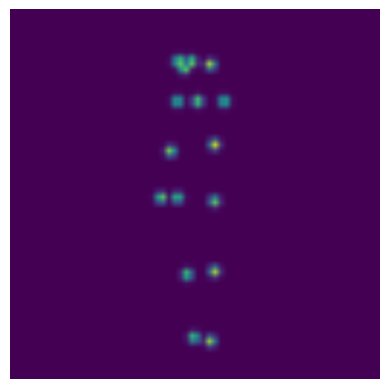

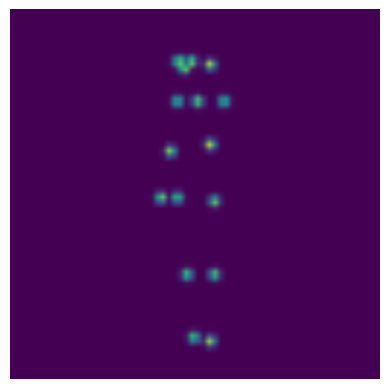

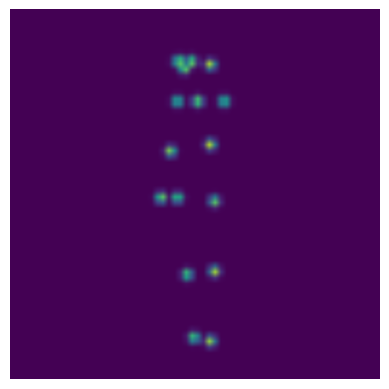

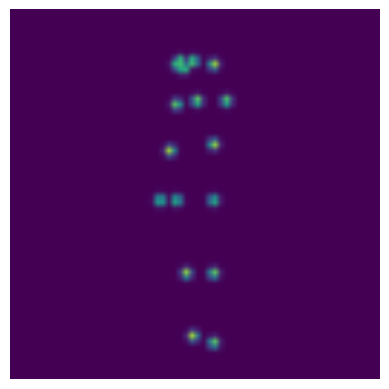

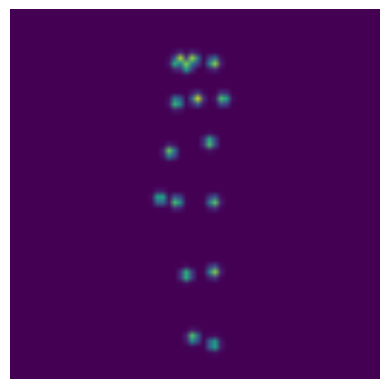

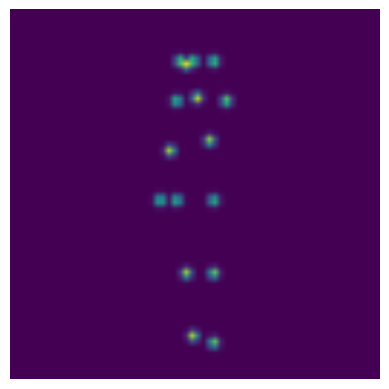

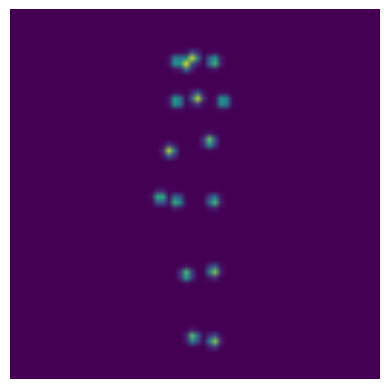

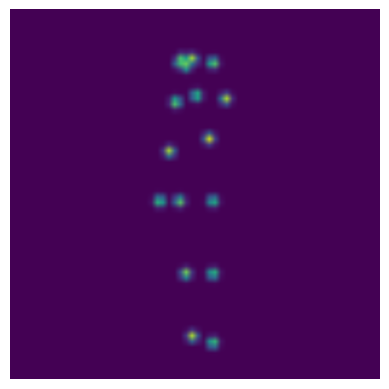

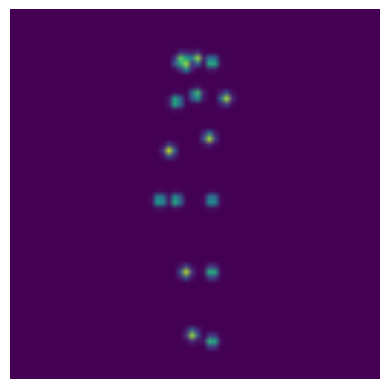

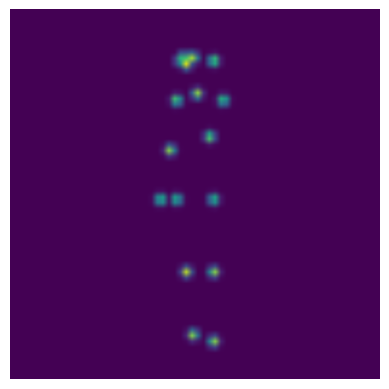

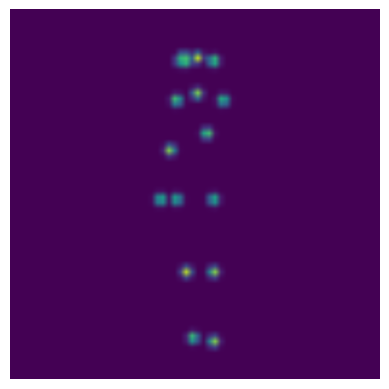

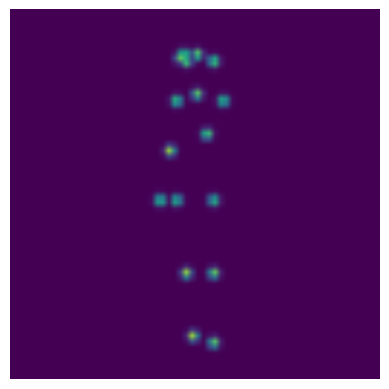

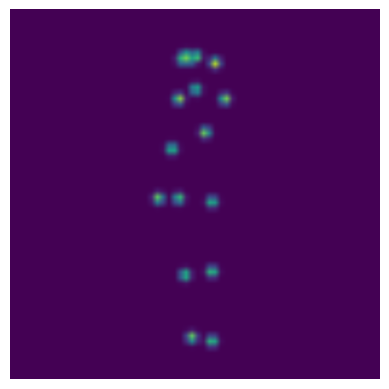

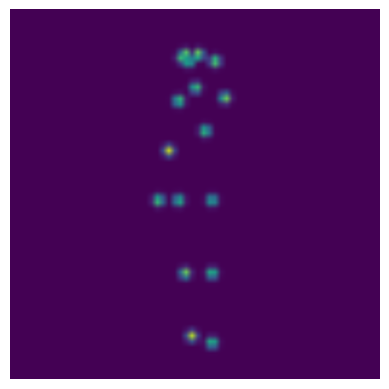

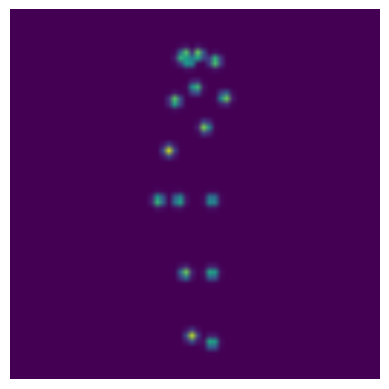

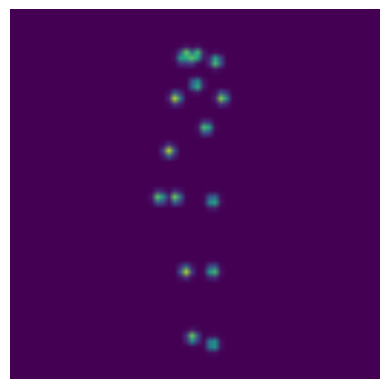

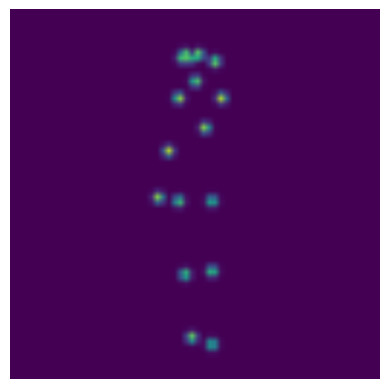

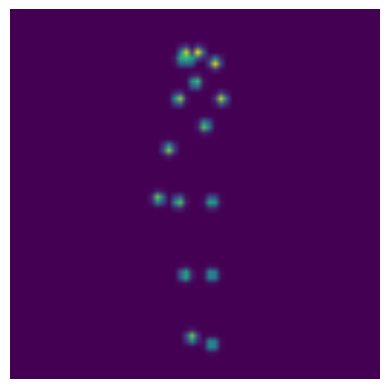

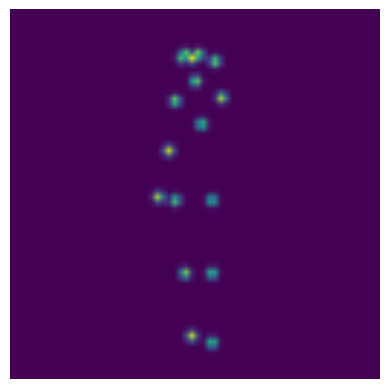

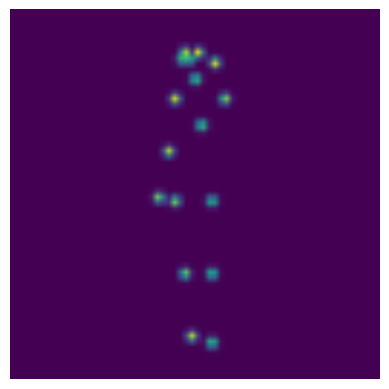

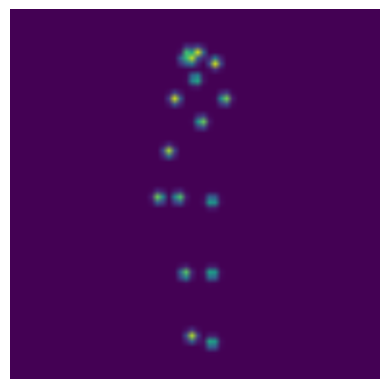

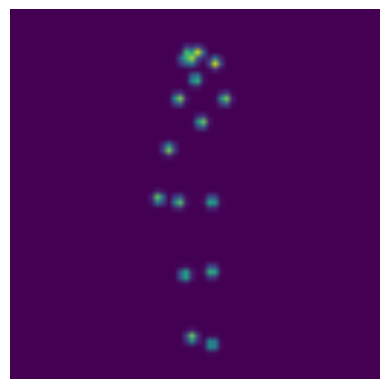

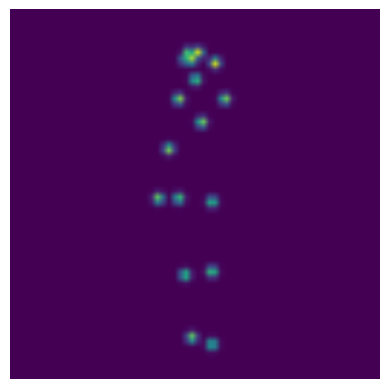

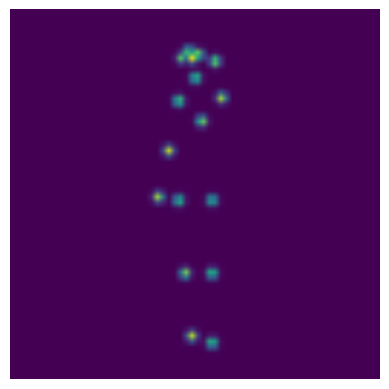

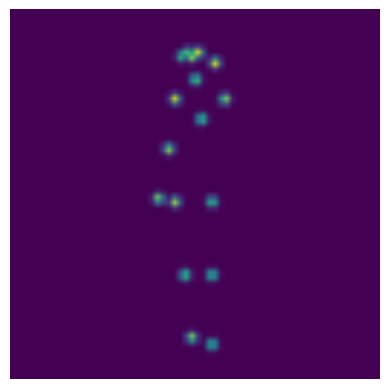

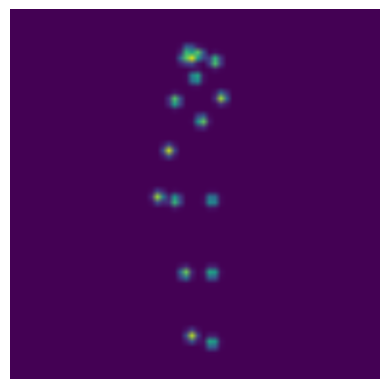

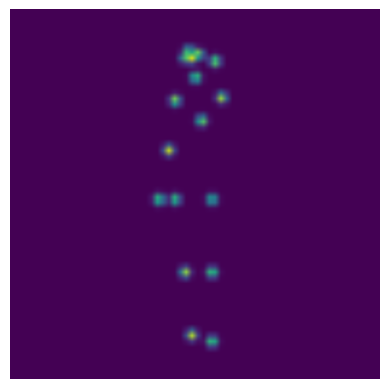

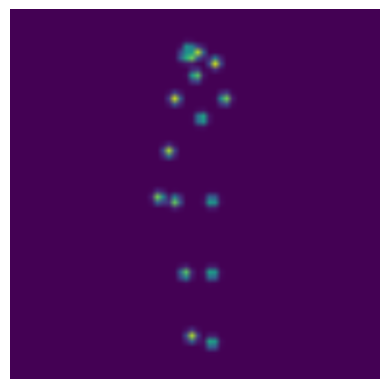

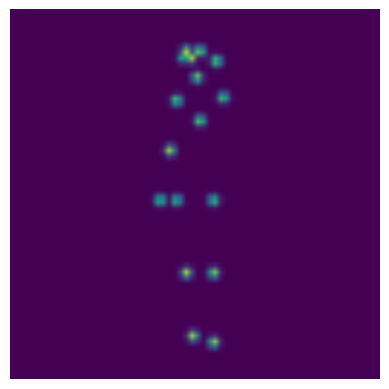

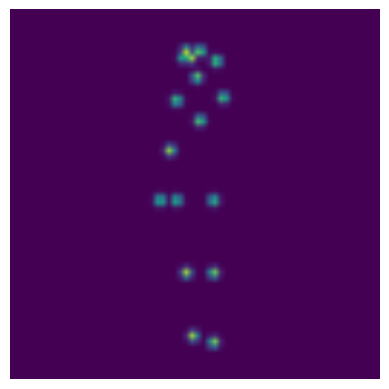

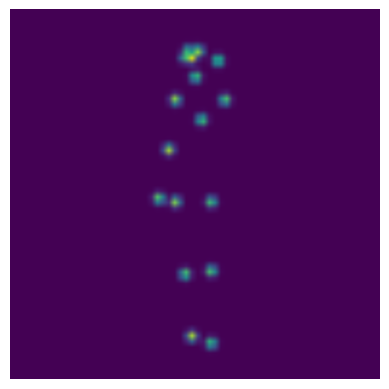

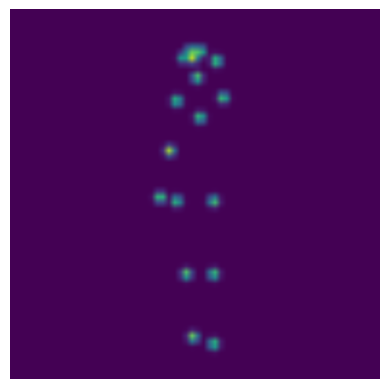

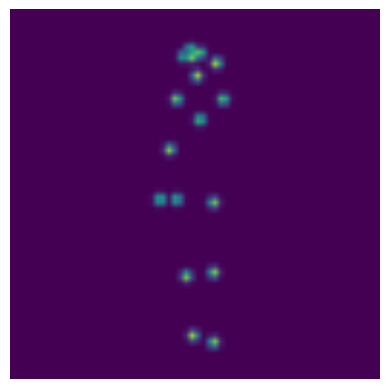

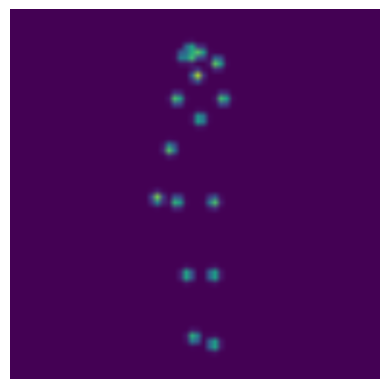

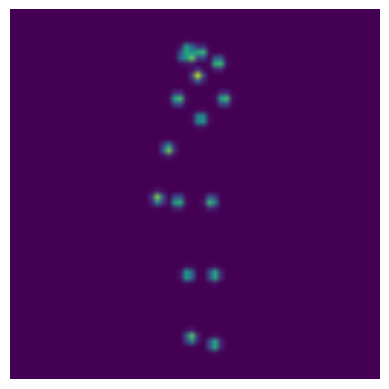

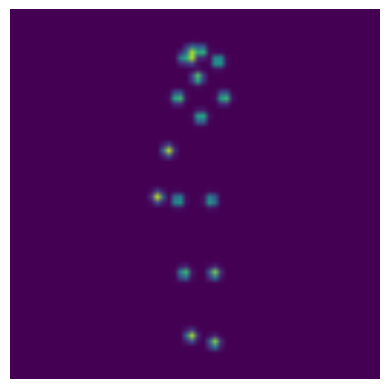

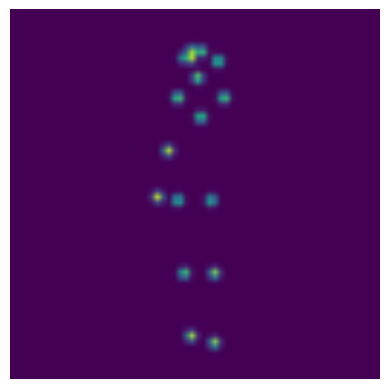

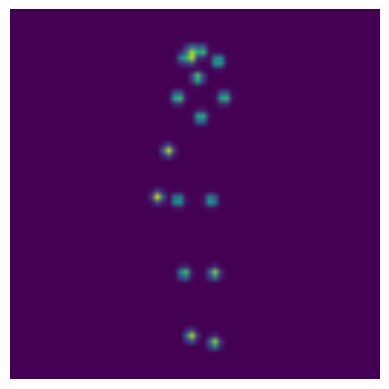

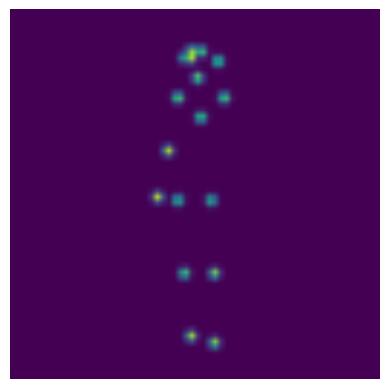

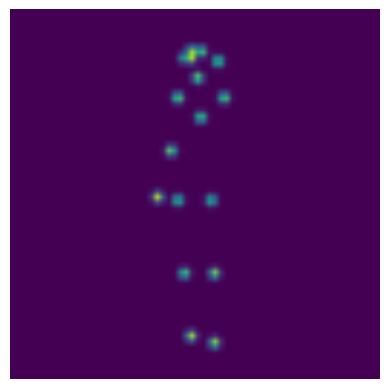

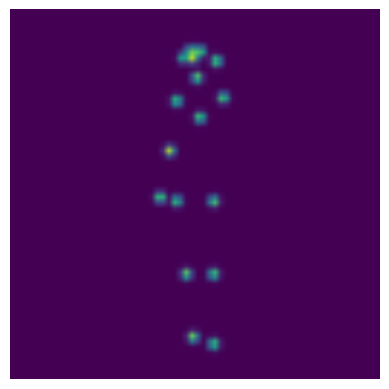

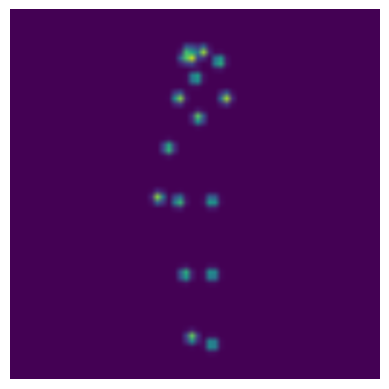

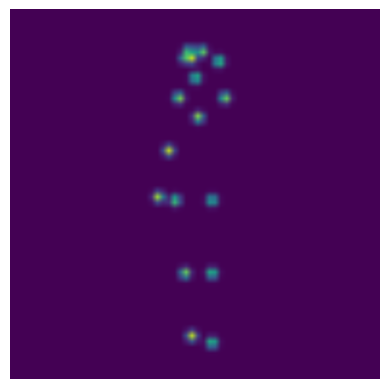

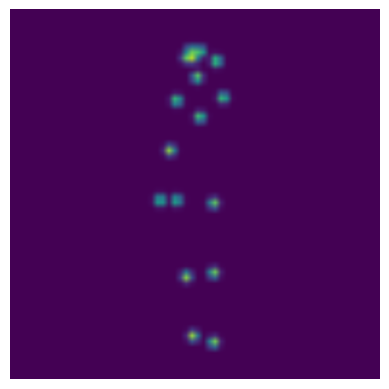

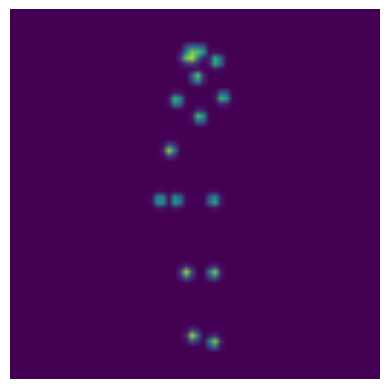

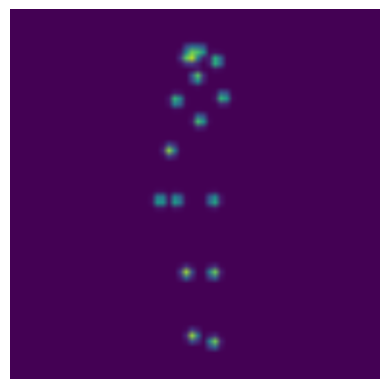

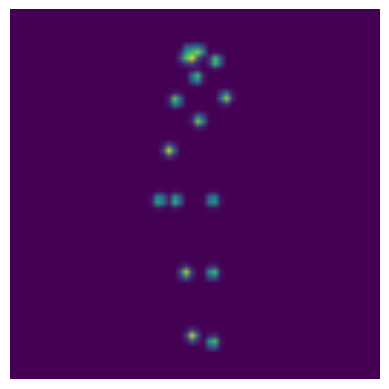

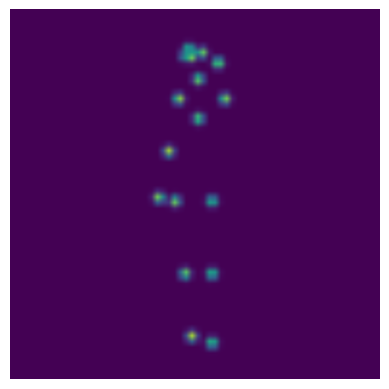

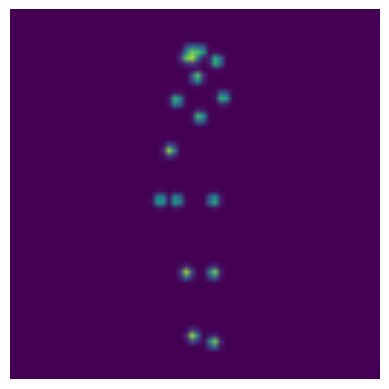

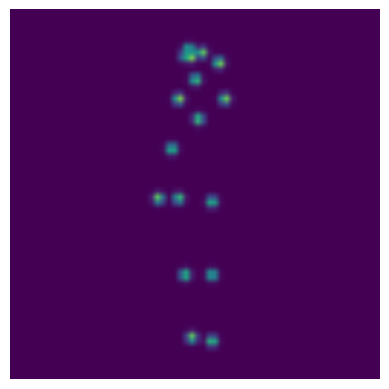

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your provided pose annotation dictionary
anno = data['annotations'][0]

# Generate the heatmaps
heatmaps = get_pseudo_heatmap(anno, flag='keypoint')  # For keypoints
# heatmaps = get_pseudo_heatmap(anno, flag='limb')   # Uncomment for limb heatmaps

# Visualize the heatmaps
visualized_heatmaps = vis_heatmaps(heatmaps, channel=-1)

# Display the first heatmap
#plt.imshow(visualized_heatmaps[0])
#plt.axis('off')  # Hide axes
#plt.show()

for heatmap in visualized_heatmaps:
    plt.imshow(heatmap)
    plt.axis('off')  # Hide axes
    plt.show()


**Action Class-58 (Shaking Hands)**

In [14]:
# Extract the annotations field
annotations = data['annotations']

for annotation in annotations:
    if annotation['frame_dir'] == 'S001C001P001R001A059':
        action_58_sample = annotation
        print(annotation)


{'frame_dir': 'S001C001P001R001A059', 'label': 58, 'img_shape': (1080, 1920), 'original_shape': (1080, 1920), 'total_frames': 99, 'keypoint': array([[[[1433. ,  321. ],
         [1441. ,  312.5],
         [1429. ,  312.5],
         ...,
         [1425. ,  588.5],
         [1450. ,  676. ],
         [1425. ,  668. ]],

        [[1431. ,  323.2],
         [1439. ,  315. ],
         [1431. ,  315. ],
         ...,
         [1427. ,  588. ],
         [1448. ,  676. ],
         [1423. ,  667.5]],

        [[1433. ,  321. ],
         [1441. ,  312.5],
         [1429. ,  312.5],
         ...,
         [1425. ,  588.5],
         [1445. ,  676. ],
         [1425. ,  668. ]],

        ...,

        [[ 872. ,  323.5],
         [ 867.5,  310.8],
         [ 863.5,  310.8],
         ...,
         [ 855. ,  601.5],
         [ 859. ,  678.5],
         [ 850.5,  691.5]],

        [[ 873. ,  323.2],
         [ 868.5,  310.5],
         [ 864.5,  314.8],
         ...,
         [ 856. ,  600. ],
         [

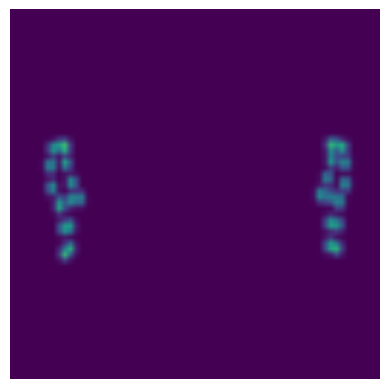

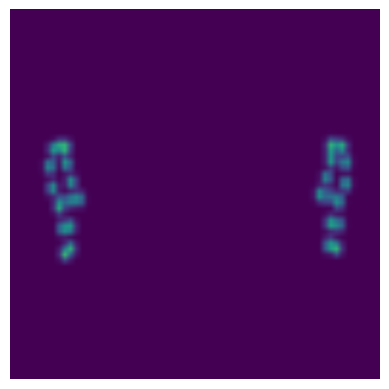

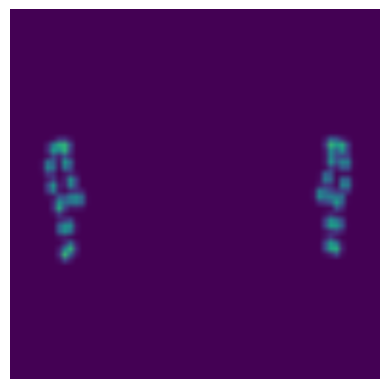

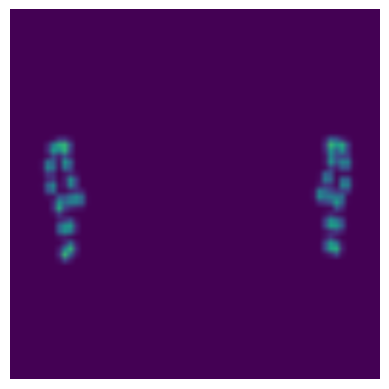

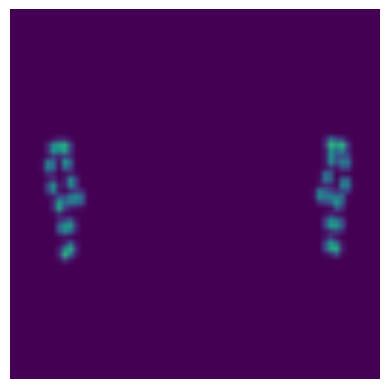

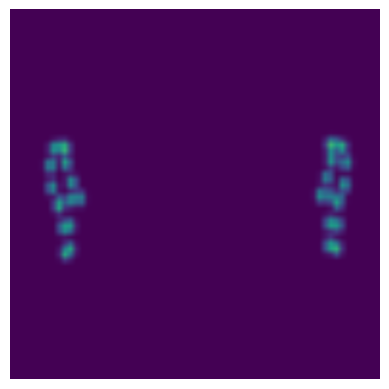

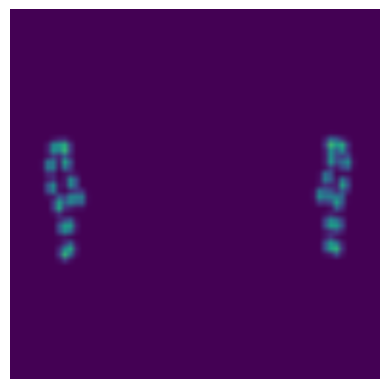

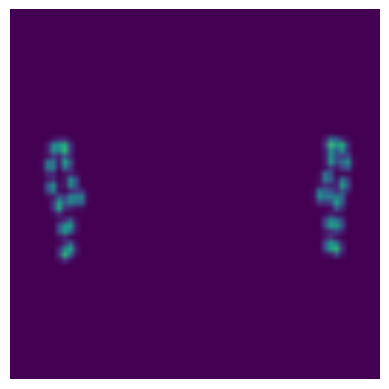

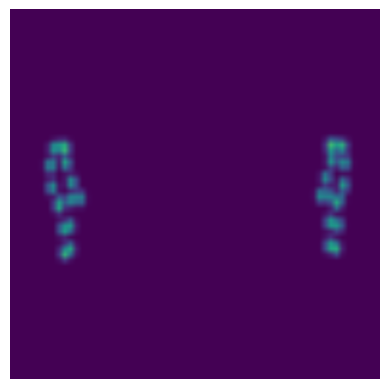

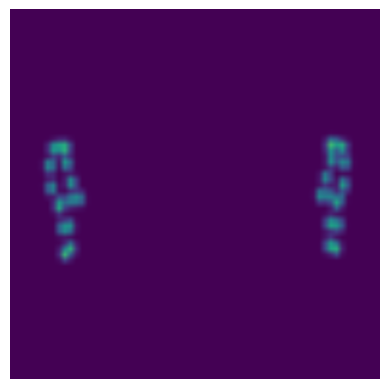

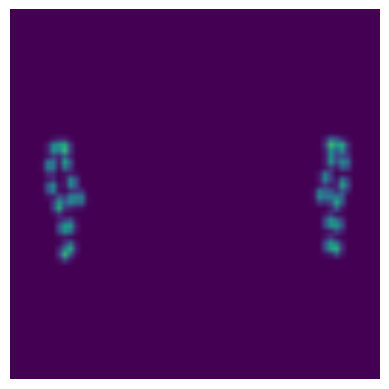

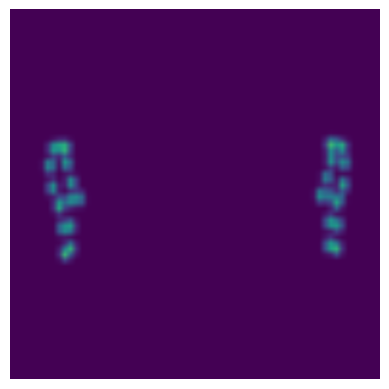

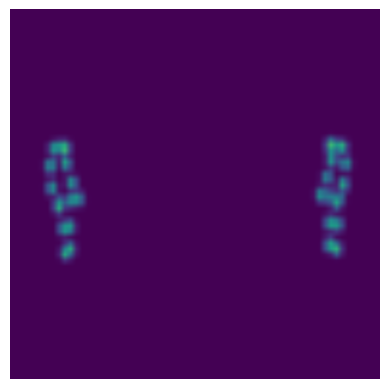

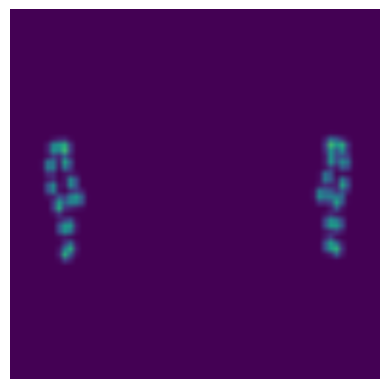

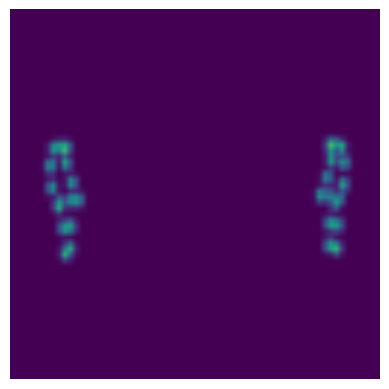

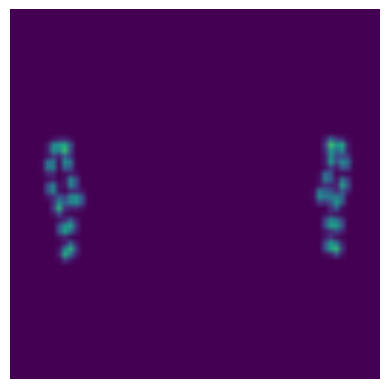

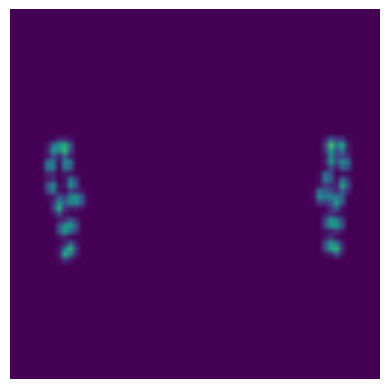

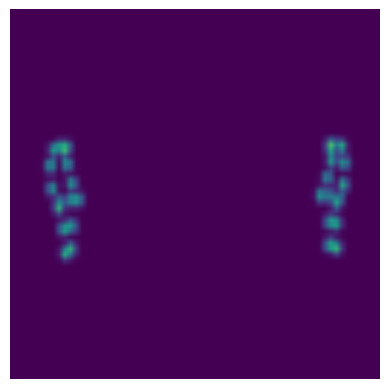

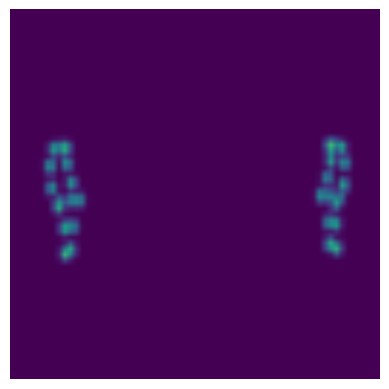

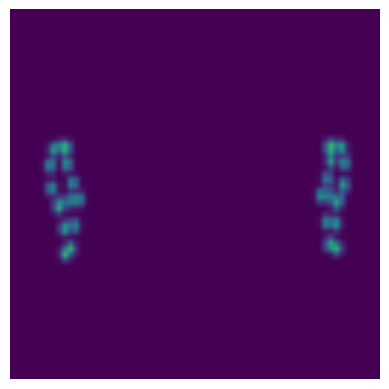

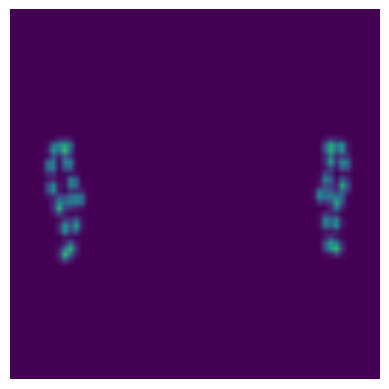

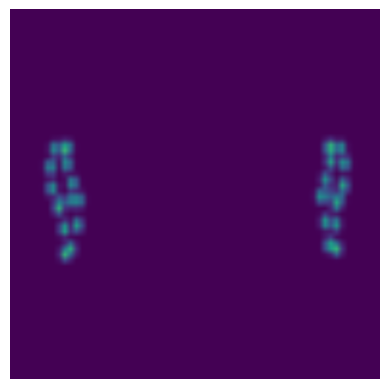

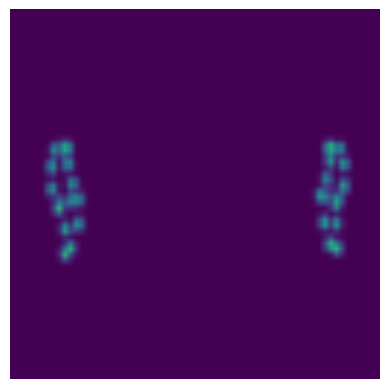

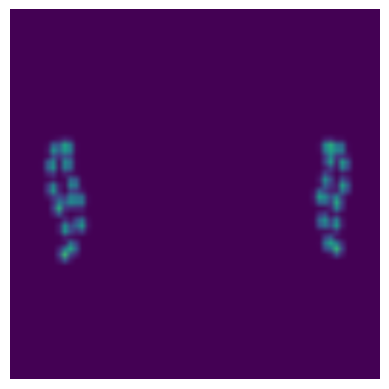

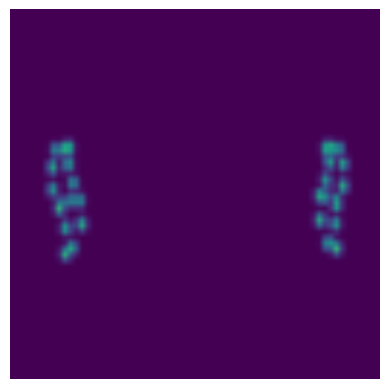

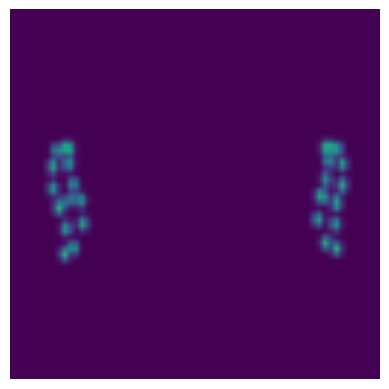

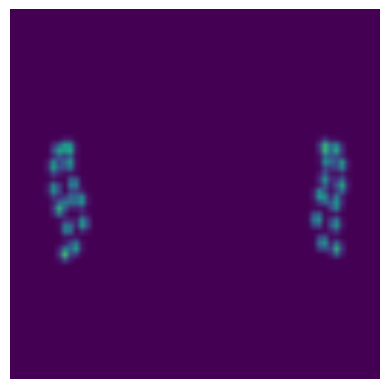

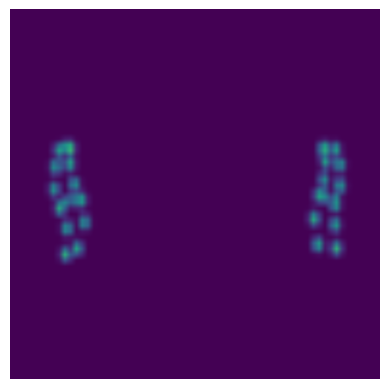

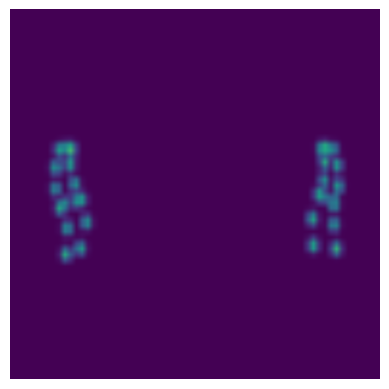

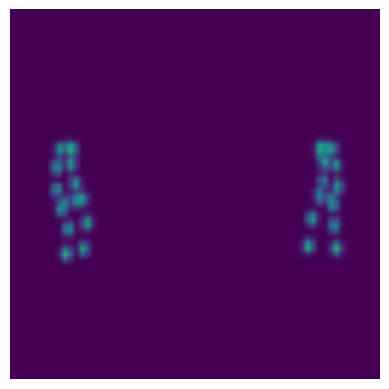

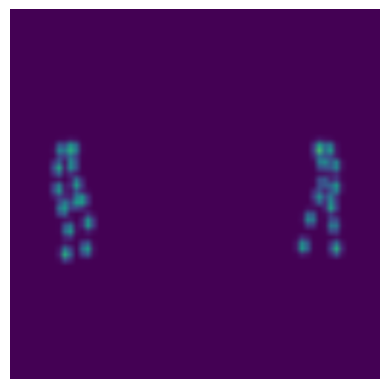

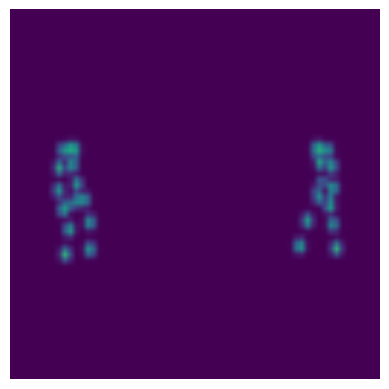

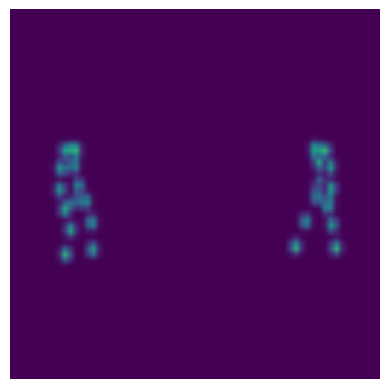

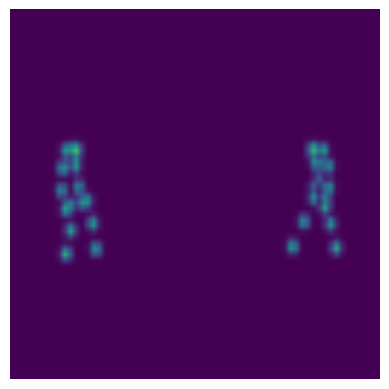

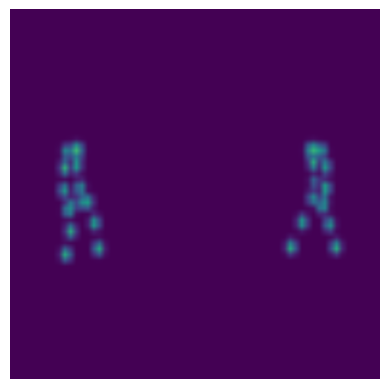

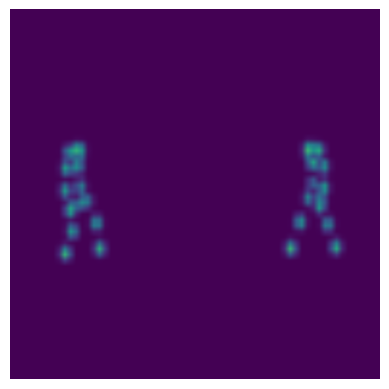

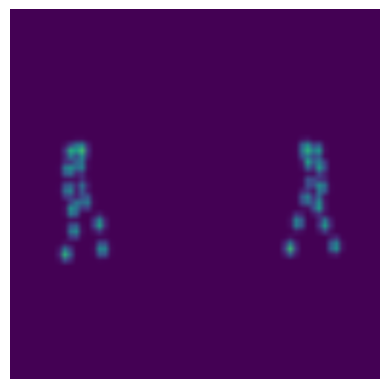

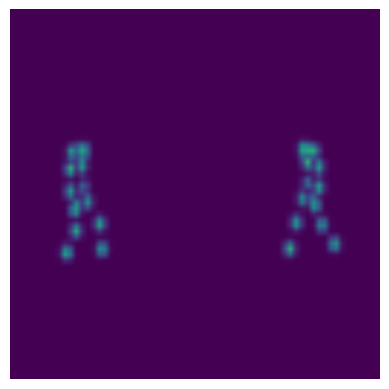

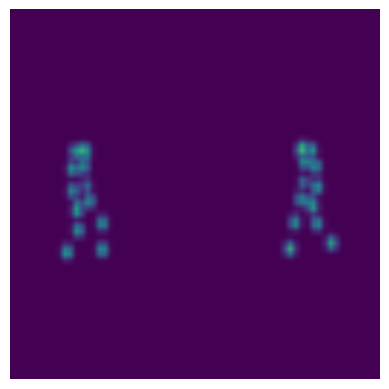

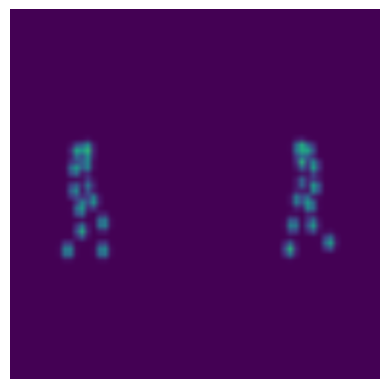

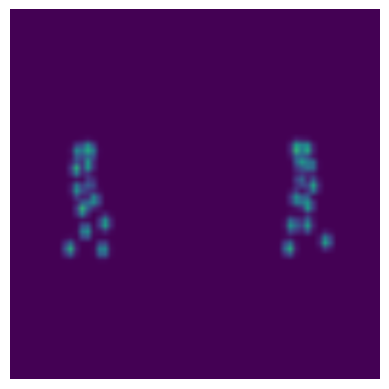

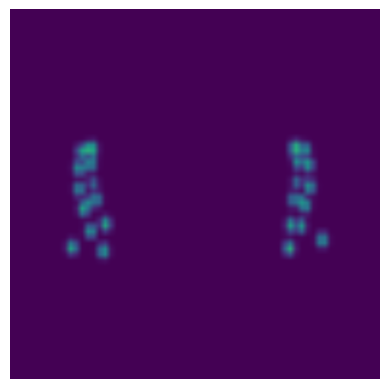

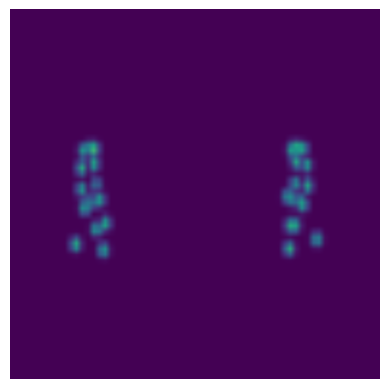

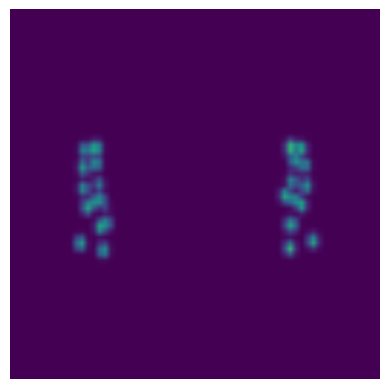

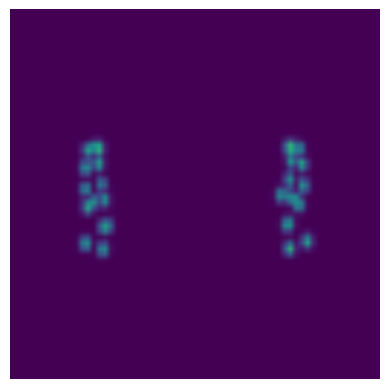

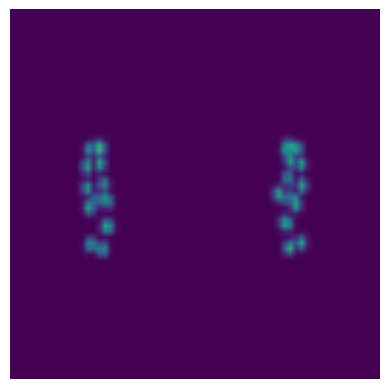

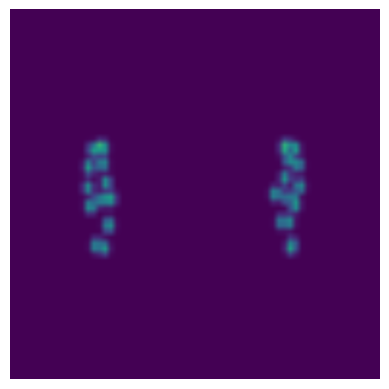

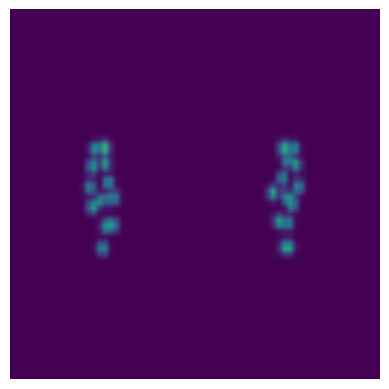

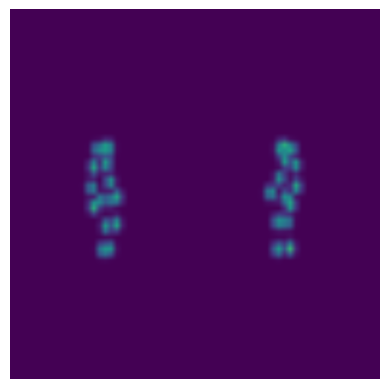

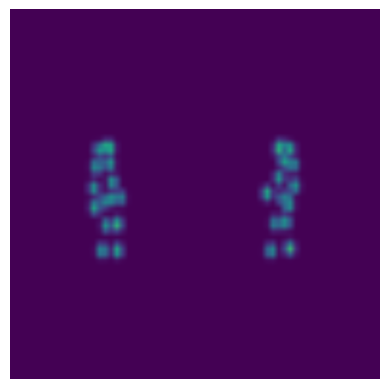

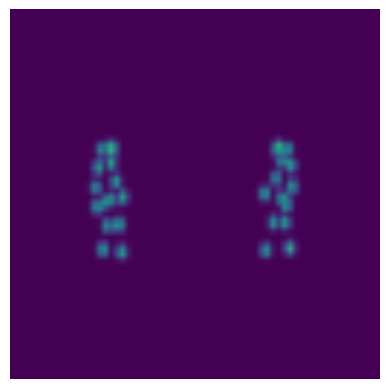

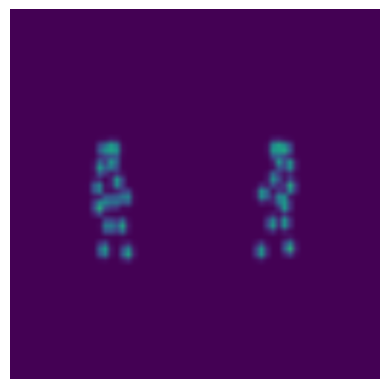

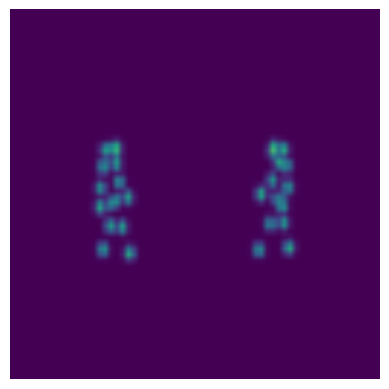

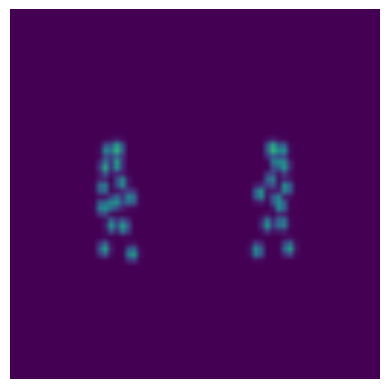

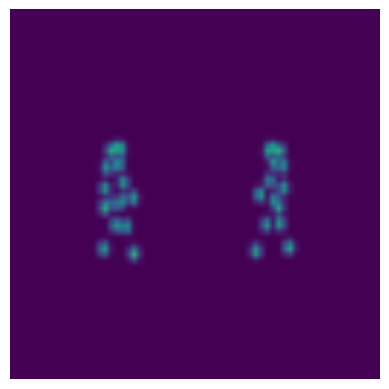

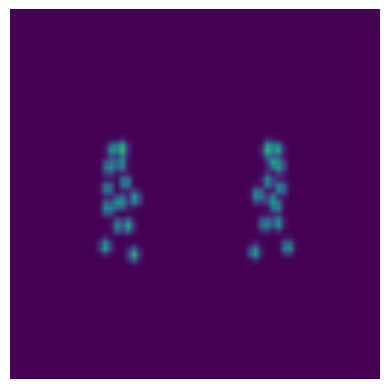

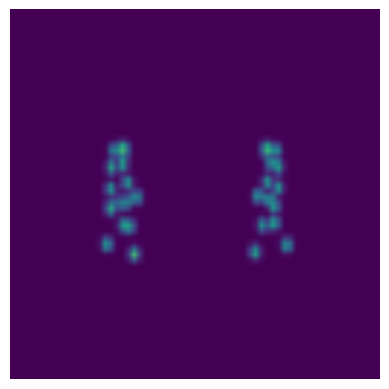

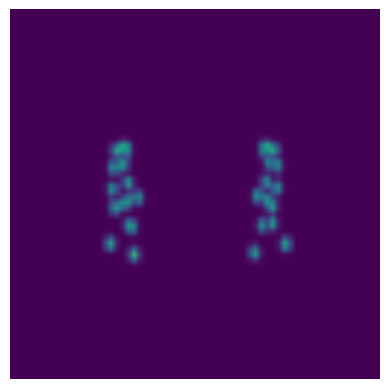

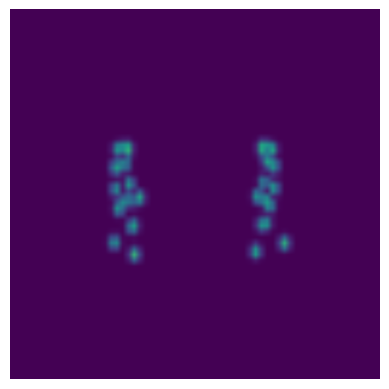

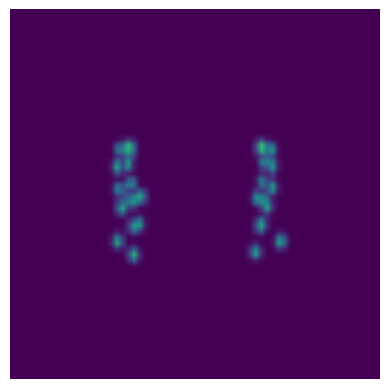

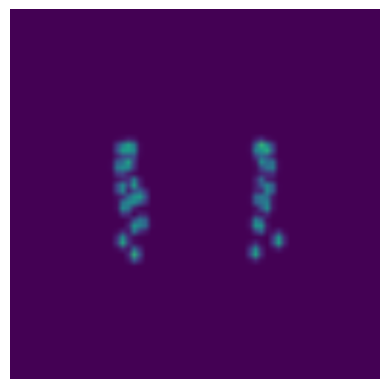

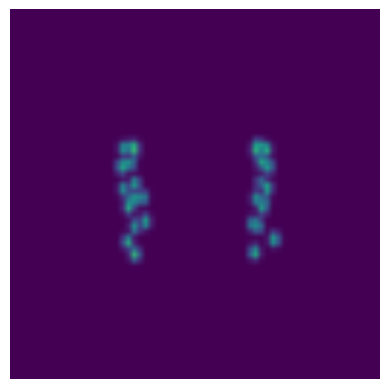

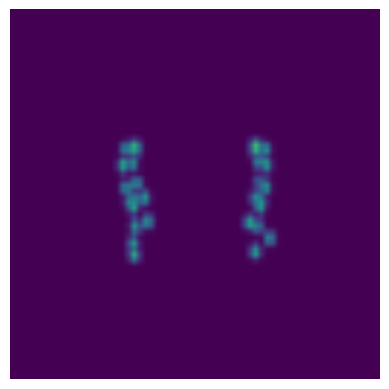

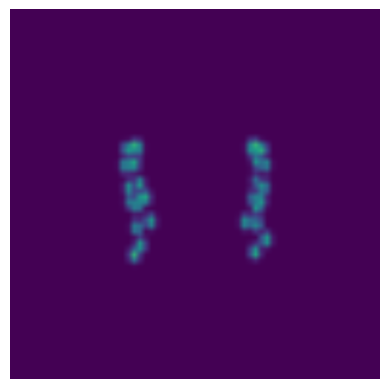

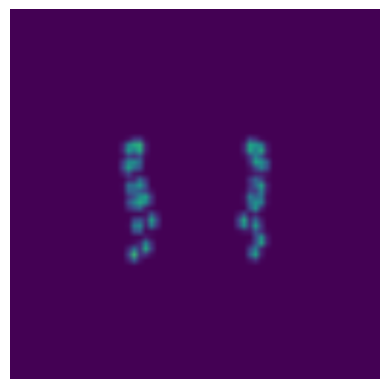

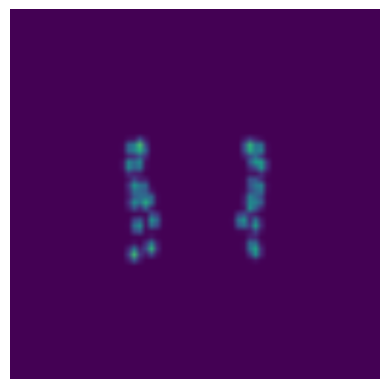

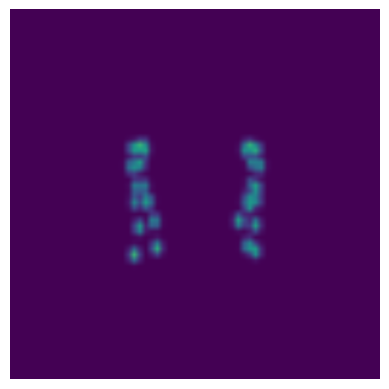

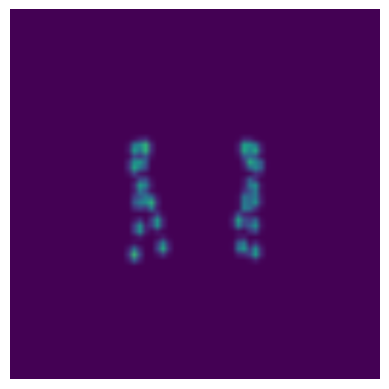

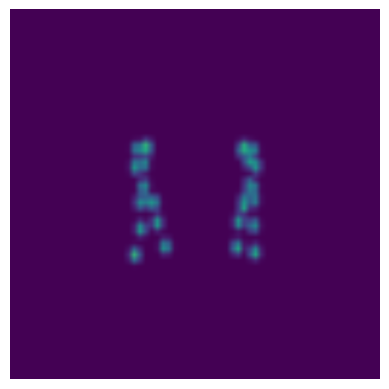

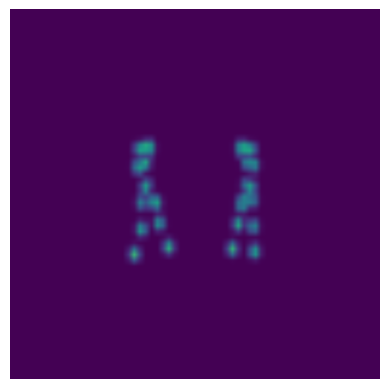

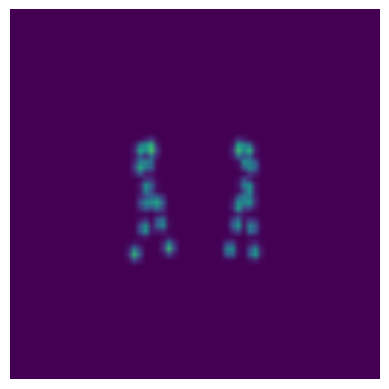

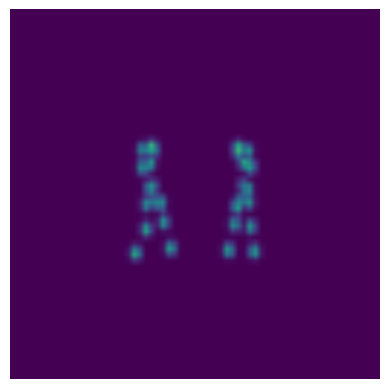

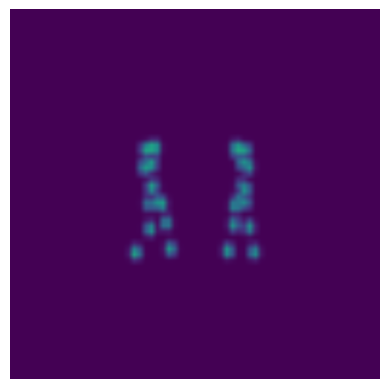

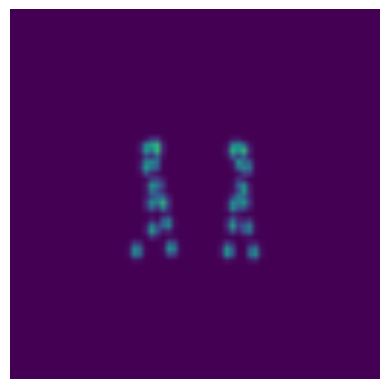

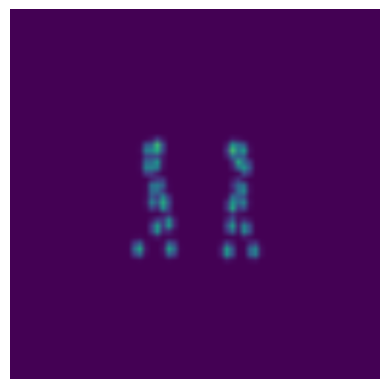

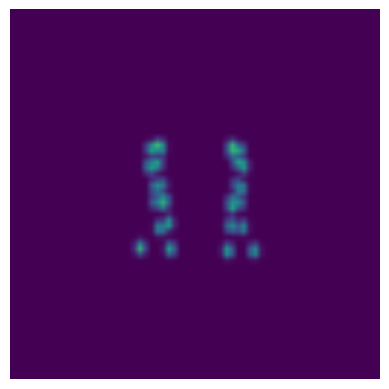

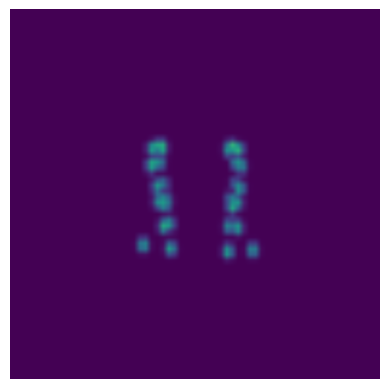

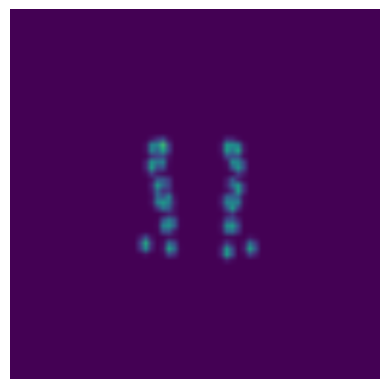

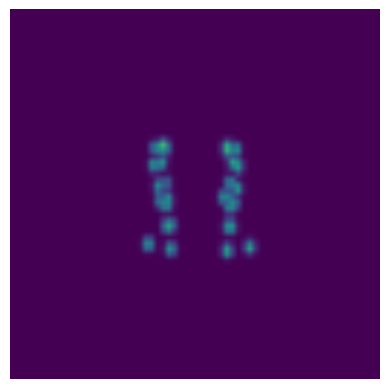

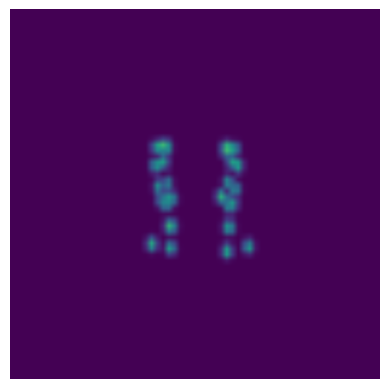

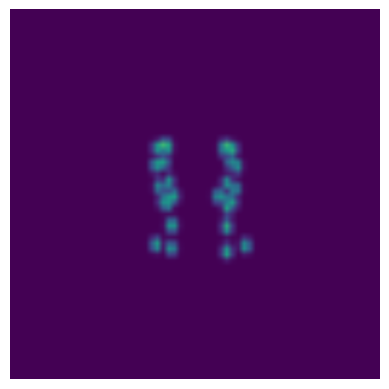

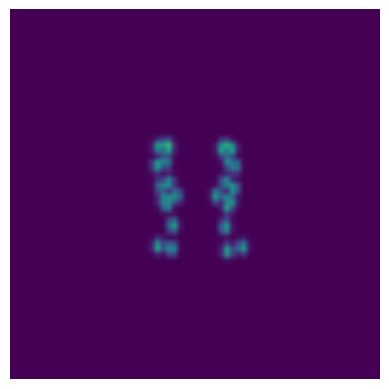

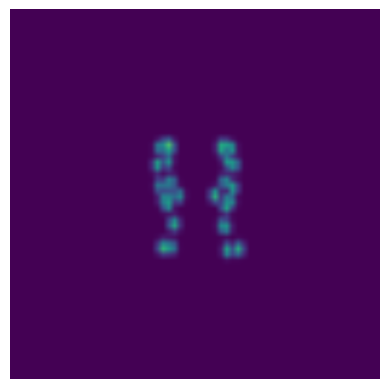

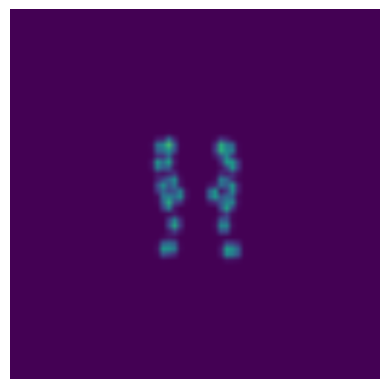

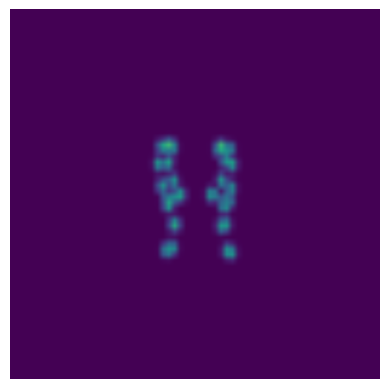

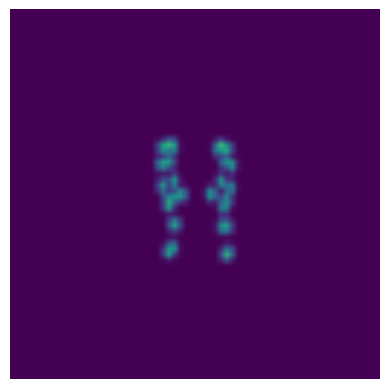

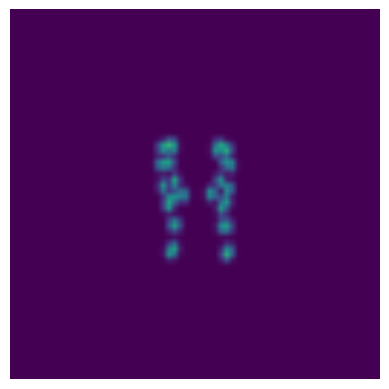

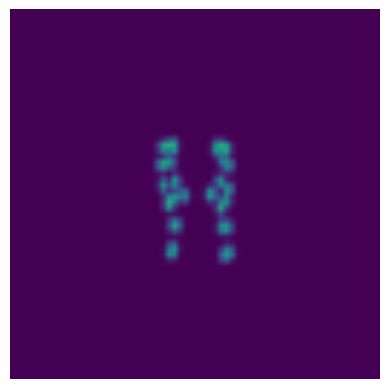

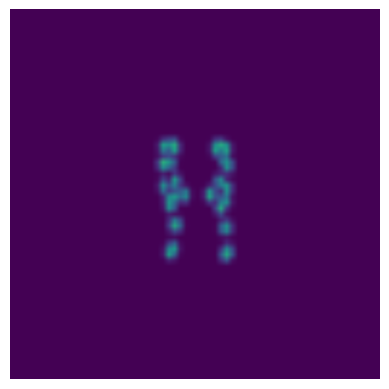

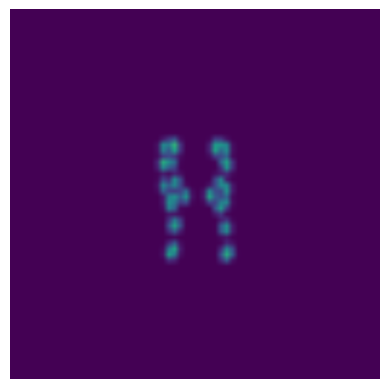

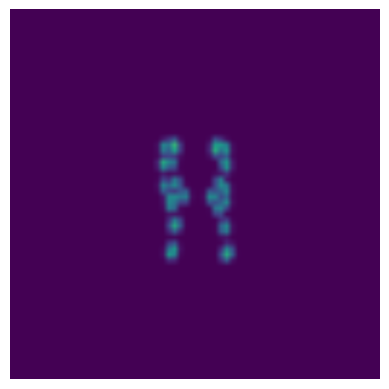

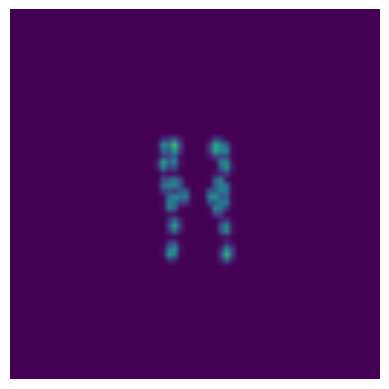

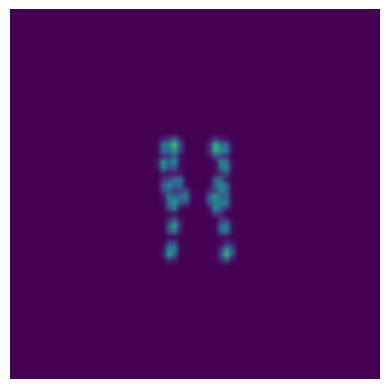

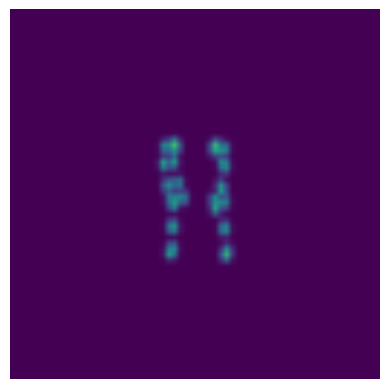

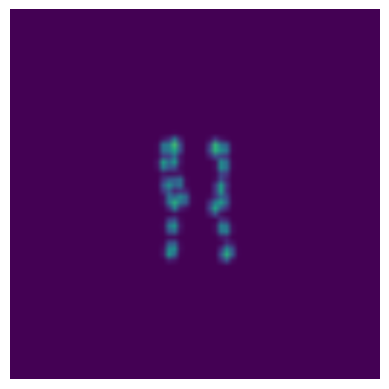

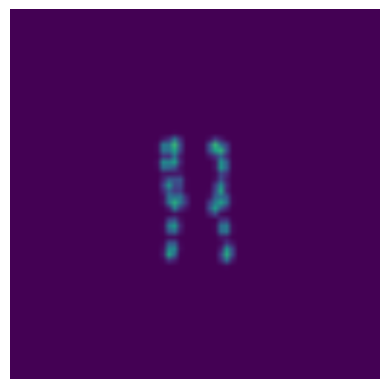

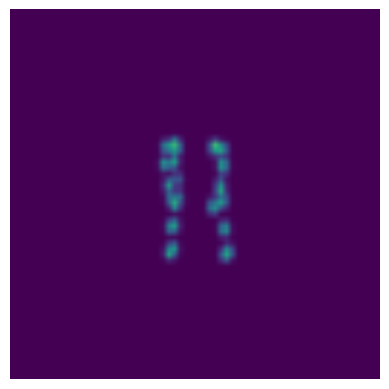

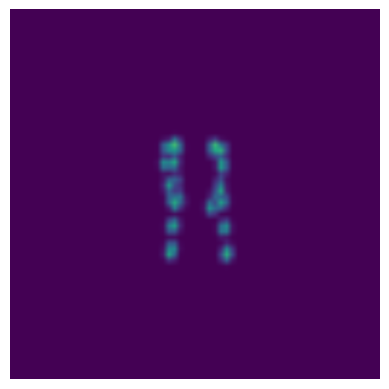

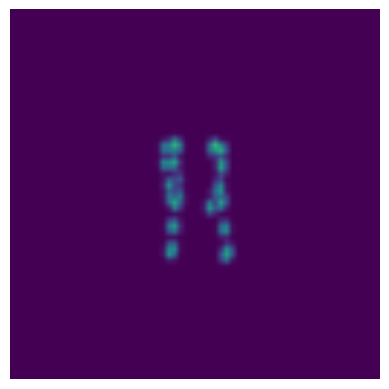

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Your provided pose annotation dictionary
anno = action_58_sample

# Generate the heatmaps
heatmaps = get_pseudo_heatmap(anno, flag='keypoint')  # For keypoints
# heatmaps = get_pseudo_heatmap(anno, flag='limb')   # Uncomment for limb heatmaps

# Visualize the heatmaps
visualized_heatmaps = vis_heatmaps(heatmaps, channel=-1)

# Display the first heatmap
#plt.imshow(visualized_heatmaps[0])
#plt.axis('off')  # Hide axes
#plt.show()

for heatmap in visualized_heatmaps:
    plt.imshow(heatmap)
    plt.axis('off')  # Hide axes
    plt.show()
